# IMPORTING LIBRARIES

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hdbscan import HDBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from tkinter import Tk
from tkinter.filedialog import askopenfilename
from scipy.cluster.hierarchy import linkage, dendrogram

# CSV FILE SELCTION

In [48]:
def select_file():
    root = Tk()
    root.withdraw()  # Hide the main Tkinter window
    file_path = askopenfilename(title="Select CSV File", filetypes=[("CSV Files", "*.csv")])
    print(file_path)
    return file_path

# Prompt user to select a file
file_path = select_file()
if not file_path:
    print("No file selected. Exiting...")
    exit()


C:/Users/HP/OneDrive/Documenti/JTBD/jtbd_dataset_without resistance.csv


# DATA SET LOADING AND PREPROCESSING

In [49]:
# Load the dataset
data = pd.read_csv(file_path)

# Drop the Story_ID column (non-numeric data)
X = data.drop(columns=["Story_ID"])

data.head()

,Story_ID,Push_1,Push_2,Push_3,Push_4,Push_5,Push_6,Push_7,Push_8,Push_9,Push_10,Push_11,Pull_1,Pull_2,Pull_3,Pull_4,Pull_5,Pull_6,Pull_7,Pull_8
0,Story_1,0,1,0,1,0,1,1,0,0,1,0,1,1,0,1,0,0,1,1
1,Story_2,1,0,0,1,0,1,1,1,0,1,0,0,0,1,0,0,0,1,1
2,Story_3,0,0,0,1,0,1,1,1,1,1,1,1,0,1,1,1,0,0,0
3,Story_4,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0
4,Story_5,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0


In [50]:
data.describe()

,Push_1,Push_2,Push_3,Push_4,Push_5,Push_6,Push_7,Push_8,Push_9,Push_10,Push_11,Pull_1,Pull_2,Pull_3,Pull_4,Pull_5,Pull_6,Pull_7,Pull_8
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.466667,0.600000,0.533333,0.600000,0.400000,0.600000,0.733333,0.400000,0.400000,0.600000,0.333333,0.533333,0.266667,0.533333,0.600000,0.400000,0.266667,0.466667,0.600000
std,0.516398,0.507093,0.516398,0.507093,0.507093,0.507093,0.457738,0.507093,0.507093,0.507093,0.487950,0.516398,0.457738,0.516398,0.507093,0.507093,0.457738,0.516398,0.507093
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,0.500000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Story_ID  15 non-null     object
 1   Push_1    15 non-null     int64 
 2   Push_2    15 non-null     int64 
 3   Push_3    15 non-null     int64 
 4   Push_4    15 non-null     int64 
 5   Push_5    15 non-null     int64 
 6   Push_6    15 non-null     int64 
 7   Push_7    15 non-null     int64 
 8   Push_8    15 non-null     int64 
 9   Push_9    15 non-null     int64 
 10  Push_10   15 non-null     int64 
 11  Push_11   15 non-null     int64 
 12  Pull_1    15 non-null     int64 
 13  Pull_2    15 non-null     int64 
 14  Pull_3    15 non-null     int64 
 15  Pull_4    15 non-null     int64 
 16  Pull_5    15 non-null     int64 
 17  Pull_6    15 non-null     int64 
 18  Pull_7    15 non-null     int64 
 19  Pull_8    15 non-null     int64 
dtypes: int64(19), object(1)
memory usage: 2.5+ KB


In [52]:
X.head()

,Push_1,Push_2,Push_3,Push_4,Push_5,Push_6,Push_7,Push_8,Push_9,Push_10,Push_11,Pull_1,Pull_2,Pull_3,Pull_4,Pull_5,Pull_6,Pull_7,Pull_8
0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,1,0,0,1,1
1,1,0,0,1,0,1,1,1,0,1,0,0,0,1,0,0,0,1,1
2,0,0,0,1,0,1,1,1,1,1,1,1,0,1,1,1,0,0,0
3,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0
4,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0


# SCATTER PLOT FOR INITIAL VISUALIZATION

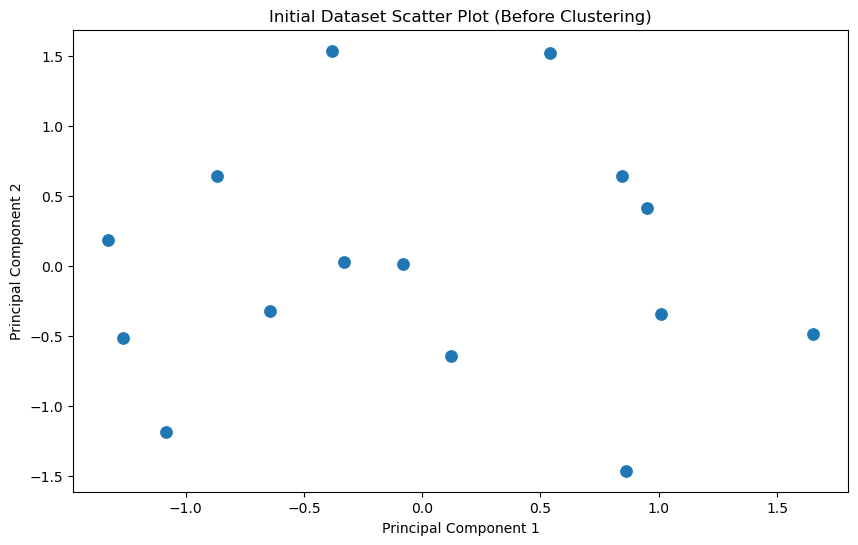

In [53]:
# Scatter plot of the dataset (initial visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], s=100)
plt.title("Initial Dataset Scatter Plot (Before Clustering)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# HDBSCAN Clustering

In [54]:
def hdbscan(x):
    # Initialize and fit HDBSCAN
    clusterer = HDBSCAN(min_cluster_size=3, min_samples=1, metric="euclidean")
    labels = clusterer.fit_predict(x)
    
    # Optionally add cluster labels to your original DataFrame if desired
    data["Cluster"] = labels
    return labels, clusterer

# SCATTER PLOT AFTER CLUSTERING

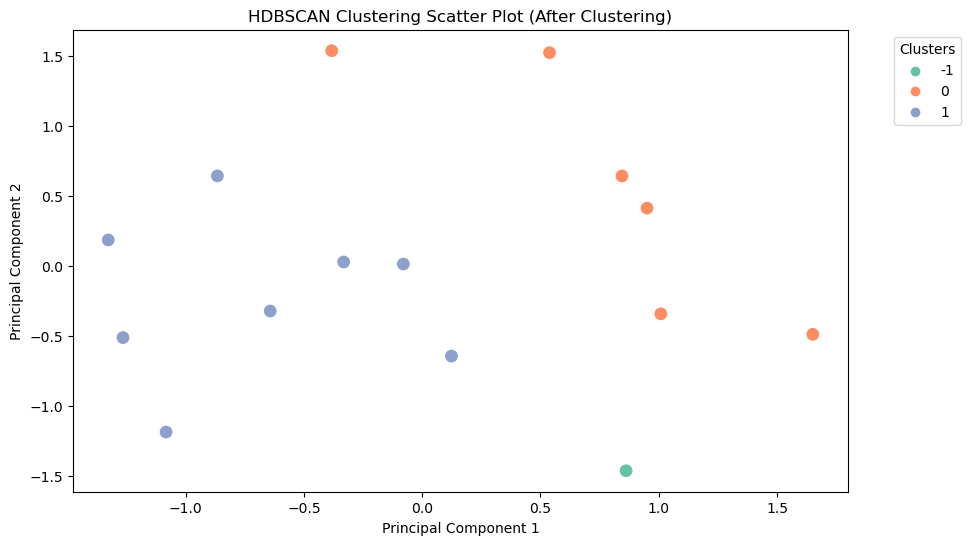

In [55]:
# Perform HDBSCAN clustering on PCA-transformed data
labels_pca, clusterer_pca = hdbscan(X_pca)

# Scatter plot after clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_pca, palette="Set2", s=100)
plt.title("HDBSCAN Clustering Scatter Plot (After Clustering)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



# DENDOGRAM

# Dendogram With Noise

C:\Users\HP\AppData\Local\Temp\ipykernel_9028\379180442.py:24: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(dissimilarity_matrix, method="average")


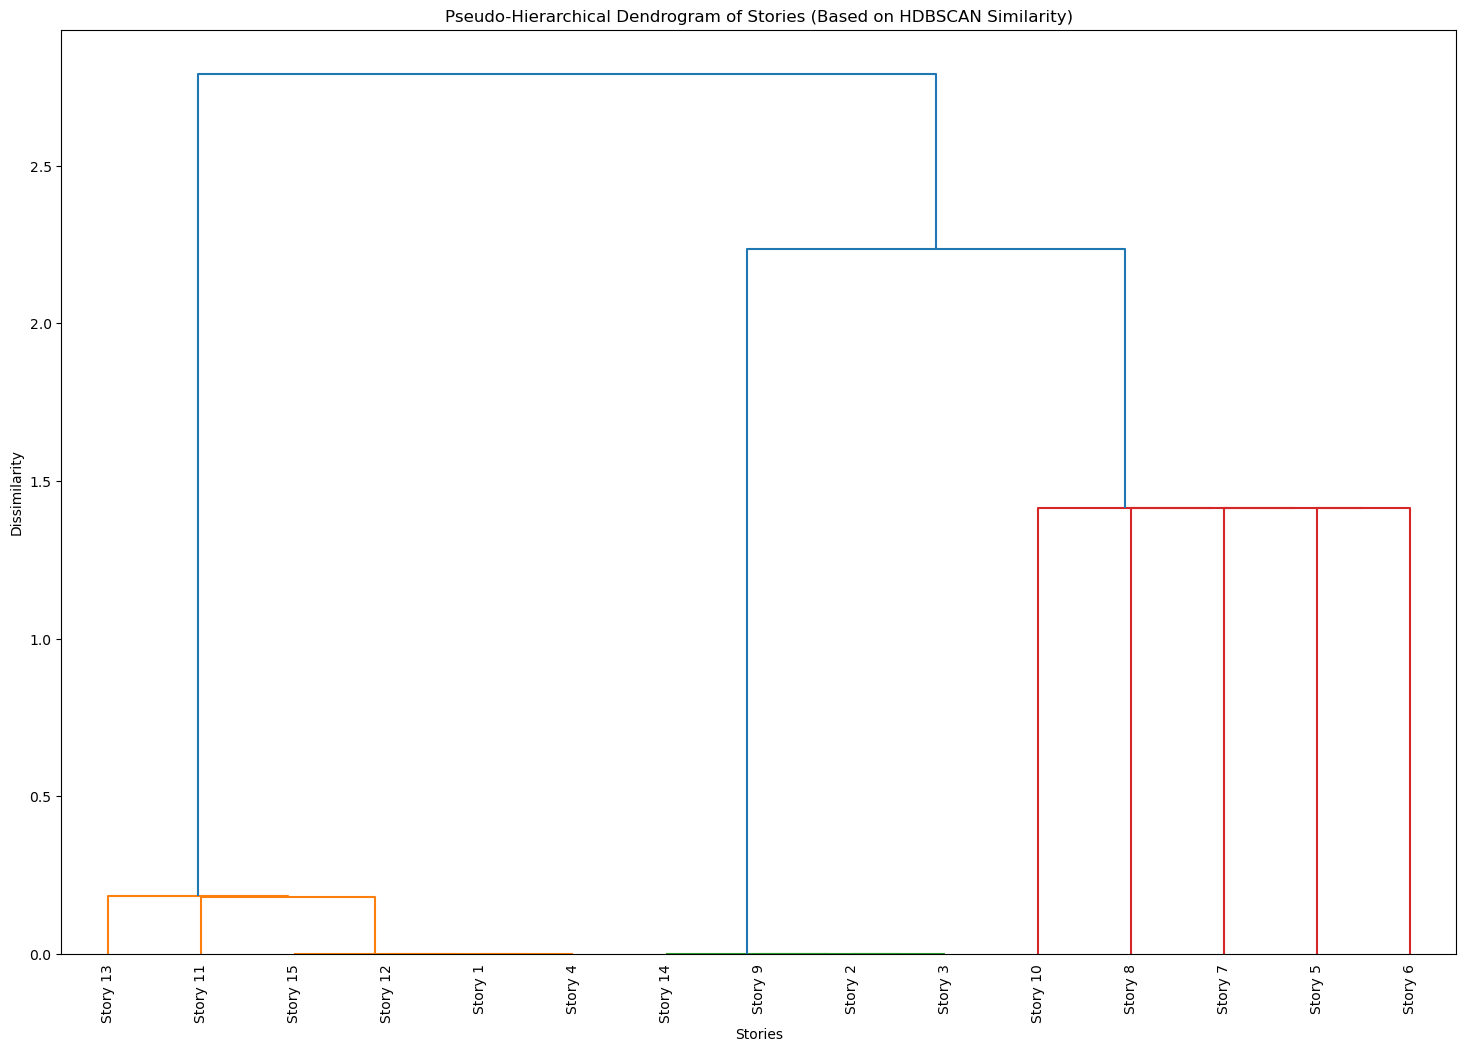

In [56]:
labels, clusterer = hdbscan(X)

# Apply HDBSCAN clustering
probabilities = clusterer.probabilities_

# Construct Similarity Matrix Using HDBSCAN Clusters
num_stories = len(X)
similarity_matrix = np.zeros((num_stories, num_stories))

for i in range(num_stories):
    for j in range(num_stories):
        if i == j:
            similarity_matrix[i, j] = 1.0  # Perfect similarity with itself
        elif labels[i] == labels[j] and labels[i] != -1:  # Same cluster, exclude noise
            # Use product of membership probabilities as similarity
            similarity_matrix[i, j] = probabilities[i] * probabilities[j]
        else:
            similarity_matrix[i, j] = 0.0  # Different clusters or noise

# Convert similarity to dissimilarity (1 - similarity)
dissimilarity_matrix = 1 - similarity_matrix

# Generate Pseudo-Hierarchical Linkage
linkage_matrix = linkage(dissimilarity_matrix, method="average")

# Plot Dendrogram for Stories
plt.figure(figsize=(18, 12))
dendrogram(linkage_matrix, labels=[f"Story {i+1}" for i in range(len(X))], leaf_rotation=90, leaf_font_size=10)
plt.title("Pseudo-Hierarchical Dendrogram of Stories (Based on HDBSCAN Similarity)")
plt.xlabel("Stories")
plt.ylabel("Dissimilarity")
plt.show()

# Dendogram Without Noise

C:\Users\HP\AppData\Local\Temp\ipykernel_9028\998841356.py:31: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(dissimilarity_matrix, method="average")


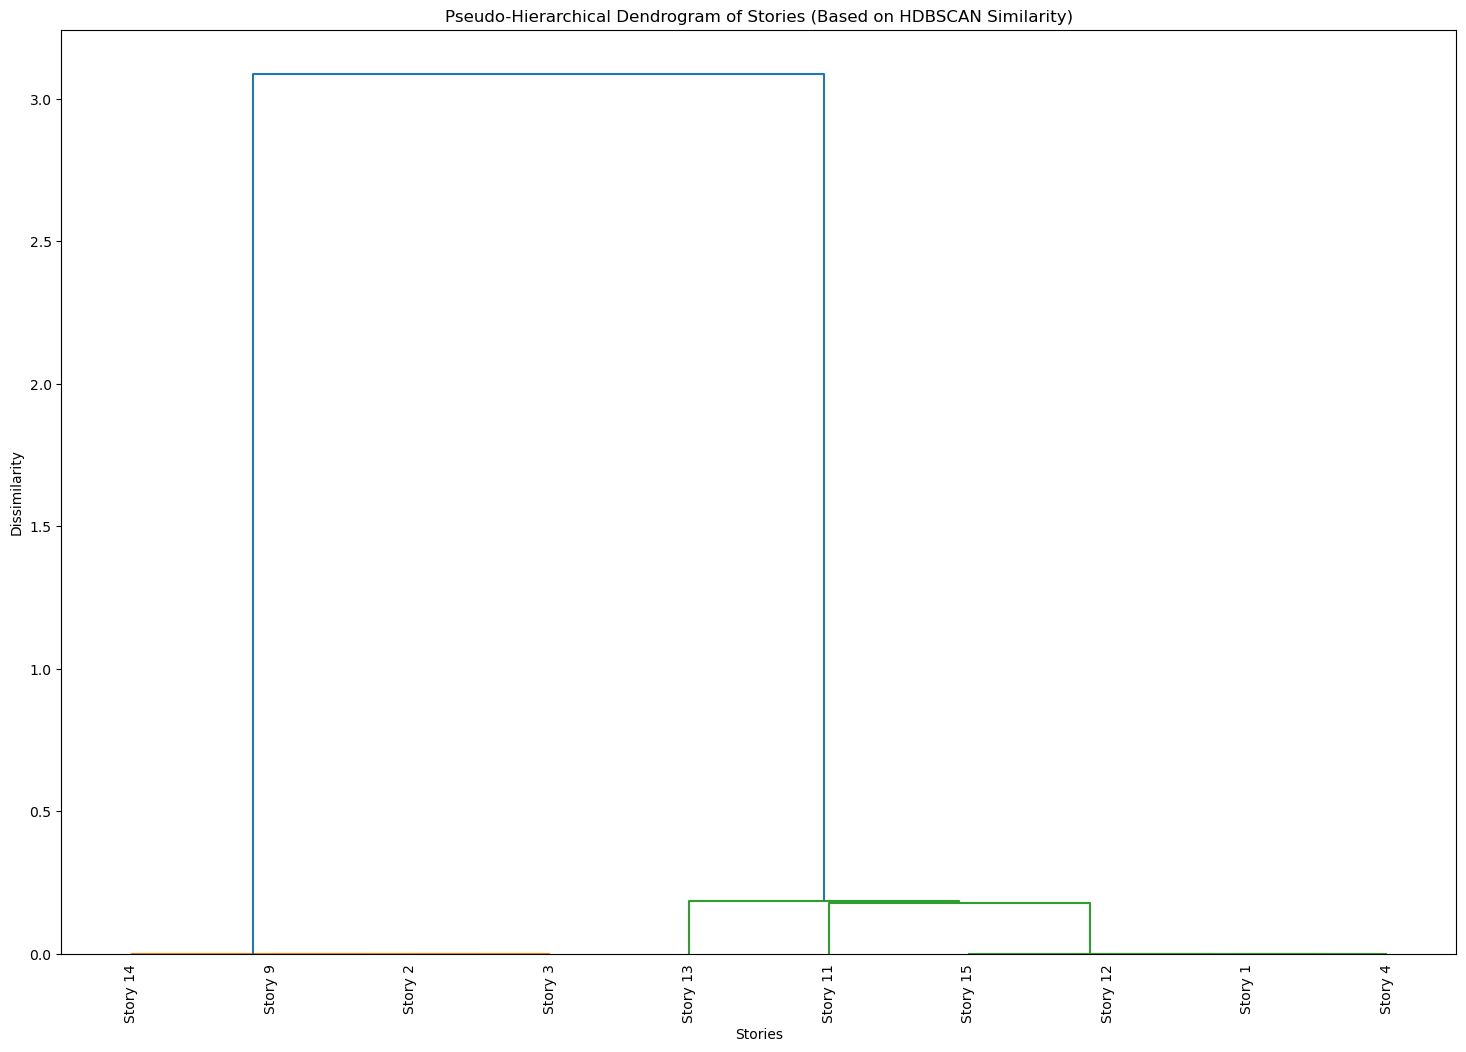

In [57]:

# Apply HDBSCAN clustering
probabilities = clusterer.probabilities_

# Rank Stories Within Clusters


# Filter out noise for similarity matrix
filtered_indices = np.where(labels != -1)[0]
filtered_X = X.iloc[filtered_indices]
filtered_labels = labels[filtered_indices]
filtered_probabilities = probabilities[filtered_indices]

# Construct Similarity Matrix Using HDBSCAN Clusters
num_stories = len(filtered_X)
similarity_matrix = np.zeros((num_stories, num_stories))

for i in range(num_stories):
    for j in range(num_stories):
        if i == j:
            similarity_matrix[i, j] = 1.0  # Perfect similarity with itself
        elif filtered_labels[i] == filtered_labels[j]:  # Same cluster
            # Use product of membership probabilities as similarity
            similarity_matrix[i, j] = filtered_probabilities[i] * filtered_probabilities[j]
        else:
            similarity_matrix[i, j] = 0.0  # Different clusters

# Convert similarity to dissimilarity (1 - similarity)
dissimilarity_matrix = 1 - similarity_matrix

# Generate Pseudo-Hierarchical Linkage
linkage_matrix = linkage(dissimilarity_matrix, method="average")

# Plot Dendrogram for Stories
plt.figure(figsize=(18, 12))
dendrogram(linkage_matrix, labels=[f"Story {i+1}" for i in filtered_indices], leaf_rotation=90, leaf_font_size=10)
plt.title("Pseudo-Hierarchical Dendrogram of Stories (Based on HDBSCAN Similarity)")
plt.xlabel("Stories")
plt.ylabel("Dissimilarity")
plt.show()


# plt.figure(figsize=(18, 12))
# dendrogram(linkage_matrix, labels=[f"Story {i+1}" for i in filtered_indices], leaf_rotation=90, leaf_font_size=10)

# # Set y-axis ticks and limits: ticks from 0 to 8 at 1 unit interval
# plt.yticks(np.arange(-, 3.1, 0.5))  # Ticks: 0, 1, 2, ... 8
# plt.ylim(-0.01, 3)

# plt.title("Pseudo-Hierarchical Dendrogram of Stories (Based on HDBSCAN Similarity)")
# plt.xlabel("Stories")
# plt.ylabel("Dissimilarity")
# plt.show()


# EVALUATION

In [58]:
# Evaluate clustering performance
if len(set(labels)) > 1:  # Ensure more than one cluster exists
    silhouette_avg = silhouette_score(X, labels)
    calinski_harabasz = calinski_harabasz_score(X, labels)    
    davies_bouldin = davies_bouldin_score(X, labels)
else:
    silhouette_avg, calinski_harabasz, davies_bouldin = None, None, None

print("Evaluation Metrics On Dataset Without Resistance Forces:")
print(f"Silhouette Score: {silhouette_avg}")
print(f"Calinski-Harabasz Score: {calinski_harabasz}")
print(f"Davies-Bouldin Score: {davies_bouldin}")

Evaluation Metrics On Dataset Without Resistance Forces:
Silhouette Score: 0.06442059767484731
Calinski-Harabasz Score: 1.9183404675666769
Davies-Bouldin Score: 2.2131303280383494
